# Customer Segmentation

In [103]:
# libraries
import pandas as pd 
import numpy as np # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.float_format = "{:.3f}".format
sns.set_style(style='darkgrid')

# Data Prepration

In [28]:
Orders = pd.read_csv('./Data/CleanedOrders.CSV')
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44776 entries, 0 to 44775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   InvoiceNo           44776 non-null  int64  
 1   ItemsList           44776 non-null  object 
 2   TotalNumberofItems  44776 non-null  int64  
 3   InvoiceDate         44776 non-null  object 
 4   AverageItemPrice    44776 non-null  float64
 5   CustomerID          44776 non-null  float64
 6   Country             44776 non-null  object 
 7   TotalOrderPrice     44776 non-null  float64
 8   IsCanceled          44776 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 2.8+ MB


In [91]:
#fixing data types 
Orders['InvoiceDate'] = pd.to_datetime(Orders['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
Orders['CustomerID'] = Orders['CustomerID'].astype('object')

#Extract more columns
Orders['CreationDate'] = Orders['InvoiceDate'].dt.date      #date
Orders['Quarter'] = Orders['InvoiceDate'].dt.quarter   #Q

In [31]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44776 entries, 0 to 44775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           44776 non-null  int64         
 1   ItemsList           44776 non-null  object        
 2   TotalNumberofItems  44776 non-null  int64         
 3   InvoiceDate         44776 non-null  datetime64[ns]
 4   AverageItemPrice    44776 non-null  float64       
 5   CustomerID          44776 non-null  object        
 6   Country             44776 non-null  object        
 7   TotalOrderPrice     44776 non-null  float64       
 8   IsCanceled          44776 non-null  bool          
 9   CreationDate        44776 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [32]:
Orders.head()

,InvoiceNo,ItemsList,TotalNumberofItems,InvoiceDate,AverageItemPrice,CustomerID,Country,TotalOrderPrice,IsCanceled,CreationDate
0,489434,"[85048, 79323, 79323, 22041, 21232, 22064, 218...",166,2009-12-01 07:45:00,4.081250,13085.0,United Kingdom,505.30,False,2009-12-01
1,489435,"[22350, 22349, 22195, 22353]",60,2009-12-01 07:46:00,2.625000,13085.0,United Kingdom,145.80,False,2009-12-01
2,489436,"[48173, 21755, 21754, 84879, 22119, 22142, 222...",193,2009-12-01 09:06:00,3.730526,13078.0,United Kingdom,630.33,False,2009-12-01
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...",145,2009-12-01 09:08:00,3.628261,15362.0,United Kingdom,310.75,False,2009-12-01
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...",826,2009-12-01 09:24:00,2.591176,18102.0,United Kingdom,2286.24,False,2009-12-01


## Data aggregation to customer level

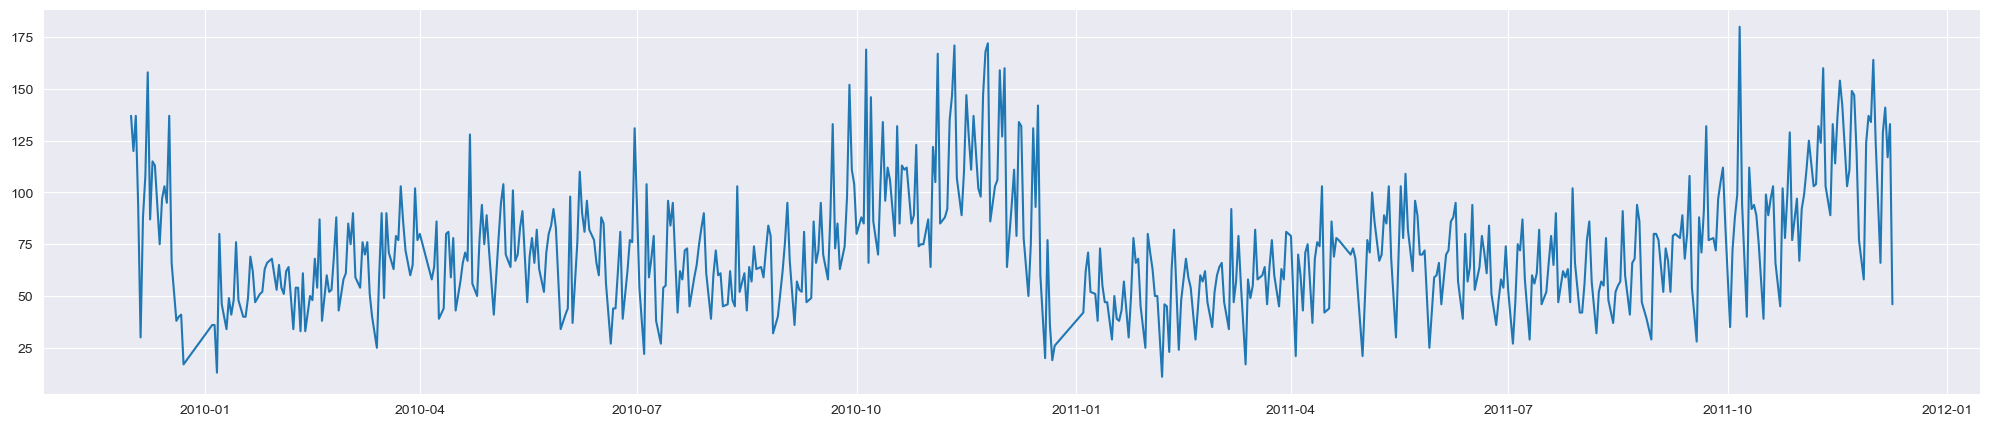

In [45]:
order_counts = Orders.groupby('CreationDate')['InvoiceNo'].count()

# Plotting
plt.figure(figsize=(25, 5))
plt.plot(order_counts.index, order_counts.values, linestyle='-')

In [69]:
purchasediff = FulfilledOrders.groupby('CustomerID').agg(
   purchasediff = ('CreationDate', lambda x : np.mean(np.abs(x.diff(1)))))['purchasediff']

purchasediff.dt.days.describe()

count    4253.000000
mean      101.946861
std        98.145173
min         0.000000
25%        38.000000
50%        72.000000
75%       130.000000
max       714.000000
Name: purchasediff, dtype: float64

<Axes: >

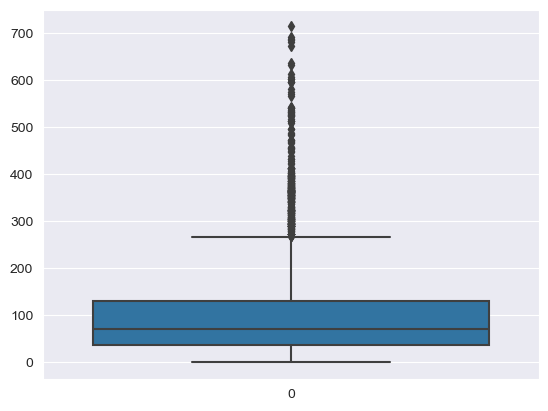

In [78]:
sns.boxplot(purchasediff.dt.days.values)

the difference is right skewed. as the median is close to 2 months and mean is close to 3 months, I assumed that the logical retention time for customers is quarterly. Considering the amount of outliers and based on intuition of an online retail market, quarter retention is fine. 

so in order to do rfm, I'll calculate the metrics based on quarterly average. 

In [110]:
FulfilledOrders = Orders[Orders['IsCanceled'] == False]
FulfilledOrders

,InvoiceNo,ItemsList,TotalNumberofItems,InvoiceDate,AverageItemPrice,CustomerID,Country,TotalOrderPrice,IsCanceled,CreationDate,Quarter
0,489434,"[85048, 79323, 79323, 22041, 21232, 22064, 218...",166,2009-12-01 07:45:00,4.081,13085.000,United Kingdom,505.300,False,2009-12-01,4
1,489435,"[22350, 22349, 22195, 22353]",60,2009-12-01 07:46:00,2.625,13085.000,United Kingdom,145.800,False,2009-12-01,4
2,489436,"[48173, 21755, 21754, 84879, 22119, 22142, 222...",193,2009-12-01 09:06:00,3.731,13078.000,United Kingdom,630.330,False,2009-12-01,4
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...",145,2009-12-01 09:08:00,3.628,15362.000,United Kingdom,310.750,False,2009-12-01,4
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...",826,2009-12-01 09:24:00,2.591,18102.000,United Kingdom,2286.240,False,2009-12-01,4
...,...,...,...,...,...,...,...,...,...,...,...
44771,581583,"[20725, 85038]",76,2011-12-09 12:23:00,1.650,13777.000,United Kingdom,124.600,False,2011-12-09,4
44772,581584,"[20832, 85038]",120,2011-12-09 12:25:00,1.285,13777.000,United Kingdom,140.640,False,2011-12-09,4
44773,581585,"[22481, 22915, 22178, 22460, 84832, 23084, 848...",278,2011-12-09 12:31:00,1.799,15804.000,United Kingdom,329.050,False,2011-12-09,4
44774,581586,"[22061, 23275, 21217, 20685]",66,2011-12-09 12:49:00,5.057,13113.000,United Kingdom,339.200,False,2011-12-09,4


In [100]:
QuarterlyAgg = FulfilledOrders.groupby(['CustomerID' , 'Quarter']).agg(
                                                        SumGMV = ('TotalOrderPrice', 'sum'),
                                                        MaxDate = ('CreationDate', 'max'),
                                                        NoOfOrders = ('InvoiceNo', 'count')     ).reset_index()
QuarterlyAgg.head()

,CustomerID,Quarter,SumGMV,MaxDate,NoOfOrders
0,12346.0,1,77210.65,2011-01-18,2
1,12346.0,2,142.31,2010-06-28,1
2,12347.0,1,475.39,2011-01-26,1
3,12347.0,2,1018.77,2011-06-09,2
4,12347.0,3,584.91,2011-08-02,1


In [111]:
RFM = QuarterlyAgg.groupby('CustomerID').agg( Recency = ('MaxDate', 'max'), Frequency =('NoOfOrders', 'mean') , Monetary = ('SumGMV', 'mean')).reset_index()
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346.000,2011-01-18,1.500,38676.480
1,12347.000,2011-12-07,2.000,1230.383
2,12348.000,2011-09-25,1.250,504.850
3,12349.000,2011-11-21,2.000,2214.345
4,12350.000,2011-02-02,1.000,334.400
...,...,...,...,...
5864,18283.000,2011-12-06,5.500,666.225
5865,18284.000,2010-10-04,1.000,461.680
5866,18285.000,2010-02-17,1.000,427.000
5867,18286.000,2010-08-20,1.000,648.215


: 

# RFM  Method

## RFM with scores

**RFM Analysis** (Recency, Frequency, Monetary) is used to segment customers based on their purchasing behavior. By analyzing how recently, how often, and how much customers spend, businesses can identify key segments such as "Champions," "Loyal Customers," or "At Risk" and tailor their marketing strategies to each group. 

[Refrence](https://www.moengage.com/blog/rfm-analysis-using-rfm-segments/)

### Steps to Follow
1. **Data Collection**: 
   - Collect customer data, including:
     - **Recency**: Date of last purchase.
     - **Frequency**: Number of purchases in a given period.
     - **Monetary**: Total spending during that period.
   
2. **Score Assignment**: 
   - Assign scores (e.g., 1-5) to each customer based on their Recency, Frequency, and Monetary data.

3. **Customer Segmentation**: 
   - Combine RFM scores to classify customers into segments like:
     - **Champions**: High scores in all categories.
     - **Loyal Customers**: Frequent and recent purchases.
     - **At Risk**: High spending but not recent.


## RFM with KMeans

# Clustering using Kmeans